### Canal Time
This file contains code to find data and make visualizations for the amount of time it takes to get from a particular node in the network to a port or country.

In [19]:
# Imports (Run before running anything else)
import matplotlib.pyplot as plt
import shipping_network as sn
import geopandas as gpd
import numpy as np

#### Parameters
To make sure the code works for any canals, input the canal and a node on the canal here.
| Canal | Nodes In Canal |
| --- | --- |
| Suez Canal | `maritime2927` |
| Panama Canal | `maritime7249` |

In [20]:
canal_name = 'suez'
orgin_node = 'maritime2927'
canal_file = 'data/Global port supply-chains/Maritime_transport/edges_suez_maritime.csv'

# canal_name = 'panama'
# orgin_node = 'maritime7249'
# canal_file = 'data/Global port supply-chains/Maritime_transport/edges_panama_maritime.csv'

save = True
present = False

PAGE_WIDTH = 7.5

if present:
    plt.style.use('metropolis')
    save_folder = 'presentation'
else:
    plt.style.use('default')
    plt.rcParams.update({
        "font.family": "serif",  # use serif/main font for text elements
        "text.usetex": True,     # use inline math for ticks
        "pgf.rcfonts": False     # don't setup fonts from rc parameters
        })
    save_folder = 'paper'

#### Fastest Route Network
Create a network showing the fastest route to get from a central node to every port

/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International Trade/Capstone/final/code/shipping_network.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ports['dist_from_' + canal_name][i] = distance # add results to dictionary
/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International Trade/Capstone/final/code/shipping_network.py:136: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '13332.37002911528' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ports['dist_from_' + canal_name][i] = distance # add results to dictionary
/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International T

,id,name,iso3,geometry,lat,lon,export,import,trans,throughput,dist_from_suez,len_from_suez,geometry_from_suez
1372,port932,Port Aransas_U.S.A.,USA,POINT (-97.07150 27.84668),27.846683,-97.071497,0.0,0.000000e+00,9689.792573,9.689793e+03,14907.400289,135.048379,"MULTILINESTRING ((32.09999084 31.69998932, 32...."
1373,port81,Avatiu_Cook Islands,COK,POINT (-159.78427 -21.20386),-21.203865,-159.784274,0.0,1.066918e+08,0.000000,1.066918e+08,21142.582246,549.344585,"MULTILINESTRING ((32.16669083 30.99999046, 32...."
1374,port1174,Searsport_U.S.A.,USA,POINT (-68.90260 44.45613),44.456131,-68.902602,0.0,1.104545e+09,0.000000,1.104545e+09,11588.282639,105.589195,"MULTILINESTRING ((32.09999084 31.69998932, 32...."
1375,port372,Galeota Point Terminal_Trinidad and Tobago,TTO,POINT (-61.00210 10.13808),10.138084,-61.002097,0.0,8.341173e+05,0.000000,8.341173e+05,11451.624824,104.637916,"MULTILINESTRING ((32.09999084 31.69998932, 32...."
1376,port721,Matthew Town_Bahamas,BHS,POINT (-73.64616 21.04686),21.046857,-73.646164,0.0,0.000000e+00,5.095891,5.095891e+00,12423.702842,112.696860,"MULTILINESTRING ((32.09999084 31.69998932, 32...."


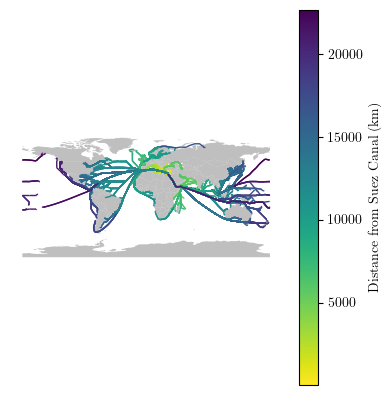

In [21]:
# read files
edges = gpd.read_file('data/Global port supply-chains/Network/edges_maritime_corrected.gpkg')
ports = sn.geodataframe_from_csv('data/Global port supply-chains/Port_statistics/port_locations_value.csv')

# get routes
ports = sn.fastest_route_from(orgin_node, edges, ports, canal_name)

# plot attributes
fig, ax = plt.subplots()
fig.set_figheight(PAGE_WIDTH / 2)
fig.set_figwidth(PAGE_WIDTH / 2)
ax.axis('off')
if save: fig.patch.set_visible(False)
sn.add_earth(ax)

# plot
ports.set_geometry('geometry_from_' + canal_name).plot( # condition removes lines that go around accross the pacific
    linewidth=1,
    column='dist_from_' + canal_name,
    cmap='viridis_r',
    legend=True,
    legend_kwds={
        'label': 'Distance from ' + canal_name.title() + ' Canal (km)',
    },
    ax=ax
)

# final things
fig.tight_layout(pad=0)
if save: fig.savefig(f'../{save_folder}/maps/port_{canal_name}_shortest_path.pdf')
ports.tail()

#### Distance to Port
Create a map showing the maritime distance from a canal to a port

/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International Trade/Capstone/final/code/shipping_network.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ports['dist_from_' + canal_name][i] = distance # add results to dictionary
/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International Trade/Capstone/final/code/shipping_network.py:136: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '13332.37002911528' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ports['dist_from_' + canal_name][i] = distance # add results to dictionary
/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International T

,id,name,iso3,geometry,lat,lon,export,import,trans,throughput,dist_from_suez,len_from_suez,geometry_from_suez
1372,port932,Port Aransas_U.S.A.,USA,POINT (-97.07150 27.84668),27.846683,-97.071497,0.0,0.000000e+00,9689.792573,9.689793e+03,14907.400289,135.048379,"MULTILINESTRING ((32.09999084 31.69998932, 32...."
1373,port81,Avatiu_Cook Islands,COK,POINT (-159.78427 -21.20386),-21.203865,-159.784274,0.0,1.066918e+08,0.000000,1.066918e+08,21142.582246,549.344585,"MULTILINESTRING ((32.16669083 30.99999046, 32...."
1374,port1174,Searsport_U.S.A.,USA,POINT (-68.90260 44.45613),44.456131,-68.902602,0.0,1.104545e+09,0.000000,1.104545e+09,11588.282639,105.589195,"MULTILINESTRING ((32.09999084 31.69998932, 32...."
1375,port372,Galeota Point Terminal_Trinidad and Tobago,TTO,POINT (-61.00210 10.13808),10.138084,-61.002097,0.0,8.341173e+05,0.000000,8.341173e+05,11451.624824,104.637916,"MULTILINESTRING ((32.09999084 31.69998932, 32...."
1376,port721,Matthew Town_Bahamas,BHS,POINT (-73.64616 21.04686),21.046857,-73.646164,0.0,0.000000e+00,5.095891,5.095891e+00,12423.702842,112.696860,"MULTILINESTRING ((32.09999084 31.69998932, 32...."


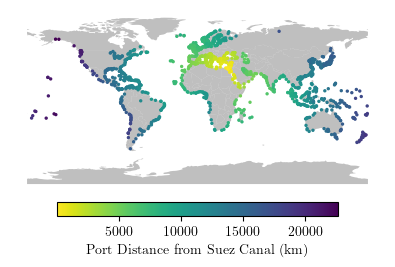

In [22]:
# read files
edges = gpd.read_file('data/Global port supply-chains/Network/edges_maritime_corrected.gpkg')
ports = sn.geodataframe_from_csv('data/Global port supply-chains/Port_statistics/port_locations_value.csv')

# get routes
ports = sn.fastest_route_from(orgin_node, edges, ports, canal_name)

# plot attributes
fig, ax = plt.subplots()
fig.set_figheight(PAGE_WIDTH / 2)
fig.set_figwidth(PAGE_WIDTH / 2)
ax.axis('off')
sn.add_earth(ax)

# plot
ports.plot( # condition removes lines that go around accross the pacific
    markersize=2,
    column='dist_from_' + canal_name,
    cmap='viridis_r',
    legend=True,
    legend_kwds={
        'label': 'Port Distance from '+canal_name.title()+' Canal (km)',
        'orientation': 'horizontal',
        'pad': 0.025,
        'shrink': 0.75
    },
    ax=ax
)

# final things
fig.tight_layout(pad=0)
if save: fig.savefig(f'../{save_folder}/maps/port_{canal_name}_distance.pdf', bbox_inches='tight', pad_inches=0)
ports.tail()

#### Distance to Country
Create a map showing the average maritime distance from a canal to a port

/var/folders/7l/ffzd6jqd4k1g060d9whf4v2c0000gn/T/ipykernel_44273/3434921669.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  earth = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International Trade/Capstone/final/code/shipping_network.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shipping_network_through_canal.rename(
/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International Trade/Capstone/final/code/shipping_network.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy 

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,iso3,q_sea_flow,v_sea_flow,q_sea_flow_suez,v_sea_flow_suez,dist_from_suez
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN,NaN,NaN,NaN,NaN,NaN
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",MNE,1.042214e+06,6.609415e+08,5818.205545,6.022491e+06,2017.217536
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN,NaN,NaN
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",TTO,5.587070e+07,1.313511e+10,632.679628,4.803041e+05,11442.507526
176,11062113.0,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",NaN,NaN,NaN,NaN,NaN,NaN


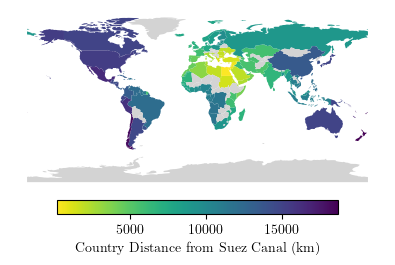

In [23]:
# read files
edges = gpd.read_file('data/Global port supply-chains/Network/edges_maritime_corrected.gpkg')
ports = sn.geodataframe_from_csv('data/Global port supply-chains/Port_statistics/port_locations_value.csv')
ports = ports[['id', 'name', 'iso3', 'geometry', 'lat', 'lon']]
shipping_network = sn.geodataframe_from_csv('data/Global port supply-chains/Maritime_transport/maritime_network_flows.csv')
shipping_through_canal = sn.geodataframe_from_csv(canal_file)
earth = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# canal scores
shipping_network = sn.canal_reliance(shipping_network, shipping_through_canal, canal_name)

# port inflow scores
ports = ports.merge(
        right=shipping_network[['to_id', 'q_sea_flow', 'v_sea_flow', 'q_sea_flow_' + canal_name, 'v_sea_flow_' + canal_name, 'q_ratio_' + canal_name, 'v_ratio_' + canal_name]],
        left_on='id',
        right_on='to_id'
    )

# get routes
ports = sn.fastest_route_from(orgin_node, edges, ports, canal_name)

# weighted average
wm = lambda x: np.average(x, weights=ports.loc[x.index, 'v_sea_flow'])

# merge data for each country
earth = earth.merge(
        right=ports[['iso3', 'q_sea_flow', 'v_sea_flow', 'q_sea_flow_' + canal_name, 'v_sea_flow_' + canal_name, 'dist_from_' + canal_name]].groupby('iso3').agg(
                q_sea_flow=('q_sea_flow', 'sum'),
                v_sea_flow=('v_sea_flow', 'sum'),
                temp1=('q_sea_flow_' + canal_name, 'sum'),
                temp2=('v_sea_flow_' + canal_name, 'sum'),
                temp3=('dist_from_' + canal_name, wm)
            ).reset_index().rename(columns={
                    'temp1': 'q_sea_flow_' + canal_name,
                    'temp2': 'v_sea_flow_' + canal_name,
                    'temp3': 'dist_from_' + canal_name
                }),
        left_on='iso_a3',
        right_on='iso3',
        how='left'
    )

# plot attributes
fig, ax = plt.subplots()
fig.set_figheight(PAGE_WIDTH / 2)
fig.set_figwidth(PAGE_WIDTH / 2)
ax.axis('off')

# plot
earth.plot( # condition removes lines that go around accross the pacific
    column='dist_from_' + canal_name,
    missing_kwds={'color': 'lightgrey'},
    cmap='viridis_r',
    legend=True,
    legend_kwds={
        'label': 'Country Distance from '+canal_name.title()+' Canal (km)',
        'orientation': 'horizontal',
        'pad': 0.025,
        'shrink': 0.75
    },
    ax=ax
)

# final things
fig.tight_layout(pad=0)
if save: fig.savefig(f'../{save_folder}/maps/country_{canal_name}_distance.pdf', bbox_inches='tight', pad_inches=0)
earth.tail()